In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
def normalize(x):
    x = x - np.min(x)
    x = x/np.max(x)
    return x

In [3]:
n = 2000
x = interp1d(np.arange(n//10), np.abs(np.random.randn(n//10)), kind="cubic")(np.linspace(0,(n//10)-1,n))
x1 = interp1d(np.arange(n//10), np.abs(np.random.randn(n//10)), kind="cubic")(np.linspace(0,(n//10)-1,n))

In [4]:
off_on = (interp1d(np.arange(n//50), np.random.randn(n//50)>0, kind="linear")(np.linspace(0,(n//50)-1,n))).astype(np.float)
x = normalize(x * off_on)*2
x1 = normalize(x1)

Text(0.5, 0, 'sample')

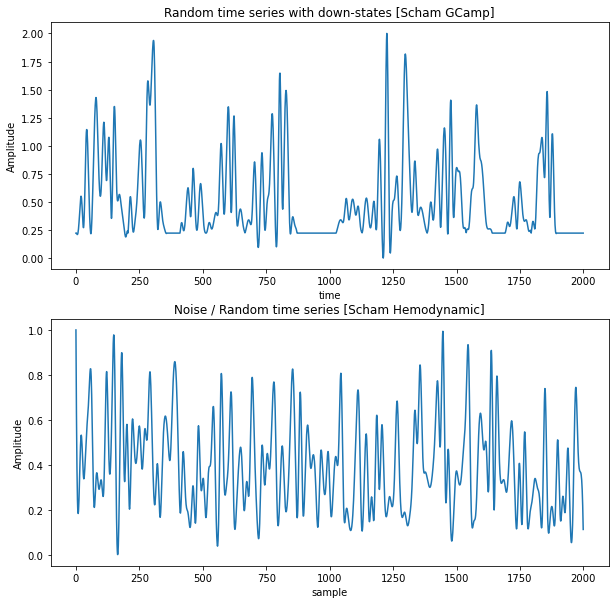

In [21]:
fig, ax = plt.subplots(2, figsize = (10, 10))
ax[0].set_title("Random time series with down-states [Scham GCamp]")
ax[0].plot(x)
ax[1].plot(x1)
ax[1].set_title("Noise / Random time series [Scham Hemodynamic]")

ax[0].set_ylabel("Amplitude")
ax[0].set_xlabel("time")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlabel("sample")

In [6]:
p1 = 10
p2 = -10

observation = x+x1
observation_error = x1 / p1 + p2

Text(0, 0.5, 'amplitude')

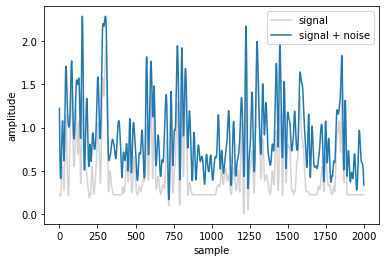

In [22]:
fig, ax = plt.subplots(1)
ax.plot(x, c ="lightgray", label="signal")
ax.plot(observation, label="signal + noise")
ax.legend()
ax.set_xlabel("sample")
ax.set_ylabel("amplitude")
#plt.plot(y, c="gray")

Text(0, 0.5, 'amplitude')

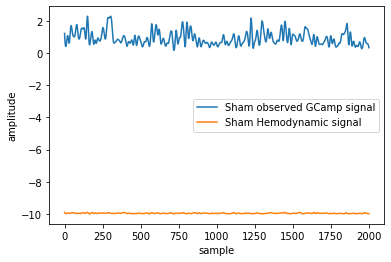

In [34]:
fig, ax = plt.subplots(1)
ax.plot(observation, label="Sham observed GCamp signal")
ax.plot(observation_error, label="Sham Hemodynamic signal")
ax.legend()
ax.set_xlabel("sample")
ax.set_ylabel("amplitude")

In [27]:
from scipy.stats import linregress
slope, intercept, r = linregress(observation_error, observation)[:3]

In [28]:
print(r)

0.4550416542480246


In [29]:
prediction = slope * observation_error + intercept

Text(0, 0.5, 'amplitude')

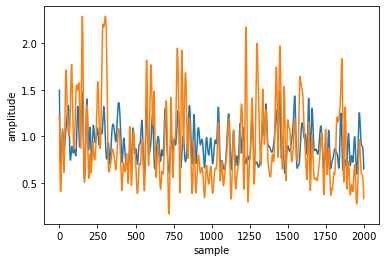

In [30]:
plt.plot(prediction)
plt.plot(observation)
plt.xlabel("sample")
plt.ylabel("amplitude")

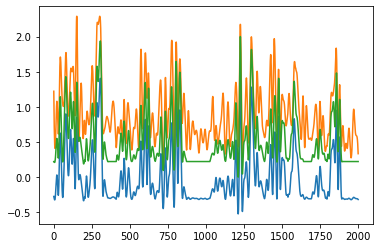

In [31]:
plt.plot(observation-prediction)
plt.plot(observation)
plt.plot(x)

In [32]:
np.corrcoef(observation, x)[0,1]

0.8781851630167887

In [33]:
np.corrcoef(observation-prediction, x)[0,1]

0.9996535794279484

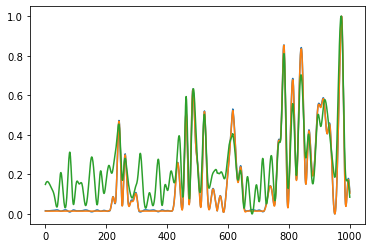

In [308]:
plt.plot(normalize(observation[:1000]-prediction[:1000]))
plt.plot(normalize(x[:1000]))
plt.plot(normalize(observation[:1000]))